# Hubungan Body Mass Index (BMI) Terhadap Kadar Glukosa Dalam Darah Menggunakan Analisis Korelasi

In [1]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy
from scipy.stats import pearsonr
import pandas as pd
from seaborn import regplot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import kstest, shapiro
from scipy import stats

In [2]:
df = pd.read_csv('datasetStroke.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
295,71379,Female,45.0,0,0,Yes,Govt_job,Urban,113.63,27.5,smokes,0
296,58261,Female,66.0,0,0,Yes,Private,Rural,141.24,28.5,never smoked,0
297,67318,Male,58.0,1,0,Yes,Govt_job,Rural,56.96,26.8,smokes,0
298,28526,Male,69.0,0,0,Yes,Self-employed,Rural,203.04,33.6,never smoked,0


# Preprocessing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 300 non-null    int64  
 1   gender             300 non-null    object 
 2   age                300 non-null    float64
 3   hypertension       300 non-null    int64  
 4   heart_disease      300 non-null    int64  
 5   ever_married       300 non-null    object 
 6   work_type          300 non-null    object 
 7   Residence_type     300 non-null    object 
 8   avg_glucose_level  300 non-null    float64
 9   bmi                260 non-null    float64
 10  smoking_status     300 non-null    object 
 11  stroke             300 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 28.2+ KB


In [4]:
df.isna().sum()

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  40
smoking_status        0
stroke                0
dtype: int64

In [5]:
# Langkah 1
rata2 = df['bmi'].mean()
# Langkah 2
df['bmi'] = df['bmi'].fillna(rata2)
# Langkah 3
df['bmi'].isna().sum()

0

In [6]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Uji Normalitas

#Misalkan ditentukan level signifikansi 5% atau 0.05. Hipotesisnya adalah:

H0 = Data terdistribusi normal
H1 = Data tidak terdistribusi normal

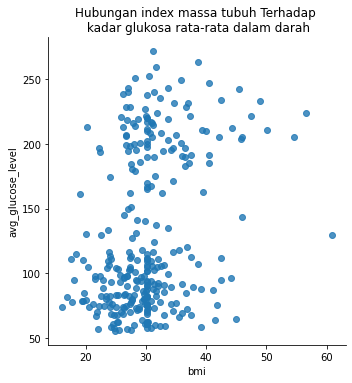

In [7]:
#Menggunakan Plot Visualisasi
sns.lmplot(x="bmi", y="avg_glucose_level", data=df, fit_reg=False)
plt.title("Hubungan index massa tubuh Terhadap \n kadar glukosa rata-rata dalam darah")
plt.show()

In [9]:
#Menggunakan Uji Shapiro-Wilk (shapiro)
swdata1 = shapiro(df['avg_glucose_level'])
swdata2 = shapiro(df['bmi'])

print("Hasil Uji Normalitas pada kadar glukosa rata-rata dalam darah")
print("___________________________________________________________________________________________________")
print(swdata1)
print("\n \nHasil Uji Normalitas pada  indeks massa tubuh")
print("____________________________________________________________________________________________________")
print(swdata2)

Hasil Uji Normalitas pada kadar glukosa rata-rata dalam darah
___________________________________________________________________________________________________
ShapiroResult(statistic=0.8673970699310303, pvalue=2.203756323815851e-15)

 
Hasil Uji Normalitas pada  indeks massa tubuh
____________________________________________________________________________________________________
ShapiroResult(statistic=0.9316027760505676, pvalue=1.6001060199055672e-10)


**Penjelasan:** Dari metode uji normalitas menggunakan uji Shapiro-Wilk pada gambar 6 di atas menunjukkan bahwa pvalue kurang dari 0.05 untuk kedua variabel baik itu “avg_glucose_level” maupun pada “bmi”. Sehingga H0 ditolak dan H1 diterima. Hal ini mengindikasikan bahwa data tidak terdistribusi normal. Oleh karena itu tidak dapat dilakukan uji korelasi dengan jenis uji pada statistik non-parametrik. Sehingga untuk melihat ada atau tidaknya hubungan atau korelasi antar 2 variabel ini dapat digunakan uji statistik non-parametrik salah satunya yaitu uji korelasi spearman. 

# Uji Korelasi Spearman

Hipotesis untuk data ini yaitu:
H0 : tidak ada korelasi antara tingkat kadar glukosa dalam darah dengan index massa tubuh (bmi)
H1 : ada korelasi antara tingkat kadar glukosa dalam darah dengan index massa tubuh (bmi)

Jika p value > 0.05 maka H0 diterima dan H1 ditolak
Jika p value < 0.05 maka H0 ditolak dan H1 diterima

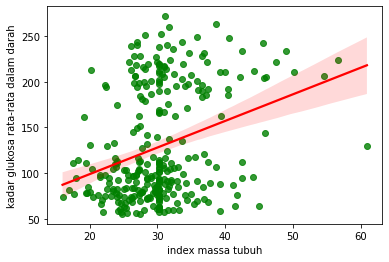

In [10]:
#Plot visualisasi arah regresi
def plt_regression(x, y, data, label_1, label_2): 
    reg_plot = regplot(x=x, y=y, fit_reg=True, data=data, line_kws={'color': 'red'}, scatter_kws= {'color': 'green'}) 
    plt.xlabel(label_1) 
    plt.ylabel(label_2) 

plt.show() 
plt_regression('bmi', 'avg_glucose_level', df,
               'index massa tubuh', 'kadar glukosa rata-rata dalam darah')

In [11]:
print(stats.spearmanr(df['avg_glucose_level'], df['bmi'])) 

SpearmanrResult(correlation=0.2715798173752017, pvalue=1.803393065842682e-06)


**Penjelasan:** Berdasarkan visualisasi dan analisis korelasi spearman yang menghasilkan nilai pvalue lebih kecil dari ∝ sehingga tolak H0 dan terima H1 mengindikasikan bahwa ada korelasi bermakna antara body mass index terhadap kadar glukosa dalam darah. Untuk Hubungan sebab akibat ditunjukkan dengan tanda positif atau negatif dari koefisien korelasi. Dari hasil di atas dapat dilihat bahwa koefisien korelasi antara tingkat kolestrol dan BMI adalah 0.27 (tanda positif). Hal ini berarti semakin tinggi kadar glukosa dalam darah, maka BMI akan semakin meningkat, begitupun sebaliknya.